In [2]:
import gym
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from envs import Maze 
%matplotlib inline

/opt/anaconda3/envs/bmrl/lib/python3.9/site-packages/pygame/pkgdata.py:27: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists


In [3]:
env = Maze()

In [4]:
initial_state = env.reset()
print(f"The new epidosde will start in state: {initial_state}")

The new epidosde will start in state: (0, 0)


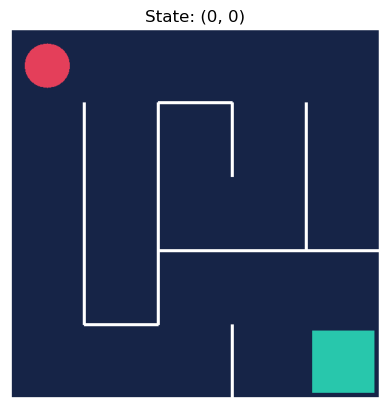

In [6]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)

In [11]:
action = 0
next_state,reward, done,info, = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got reward of: {reward}")
print(f"After moving down 1 row, the task is", "" if done else "not", "finish")

After moving down 1 row, the agent is in state: (0, 0)
After moving down 1 row, we got reward of: -1.0
After moving down 1 row, the task is not finish


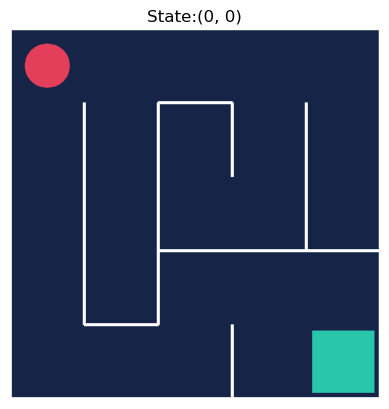

In [13]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f'State:{next_state}')
plt.imshow(frame)

In [14]:
env.close()

In [15]:
env=Maze()

In [17]:
print(f"For example. the initial state is:{env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example. the initial state is:(0, 0)
The space state is of type: MultiDiscrete([5 5])


In [18]:
print(f"An example of valid action is :{env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of valid action is :0
The action state is of type: Discrete(4)


In [20]:
env = Maze()
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    trajectory.append([state,action,reward,done,next_state])
    state = next_state
env.close()
print(f"Congrats! You just generated your first traj:\n{trajectory}")

Congrats! You just generated your first traj:
[[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)]]


In [22]:
env = Maze()
state = env.reset()
episode = []
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state,action,reward,done,next_state])
    state = next_state
env.close()
print(f"Congrats! You just generated your first traj:\n{episode}")

Congrats! You just generated your first traj:
[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 3, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 1, -1.0, False, (0, 4)], [(0, 4), 0, -1.0, False, (0, 4)], [(0, 4), 3, -1.0, False, (0, 3)], [(0, 3), 0, -1.0, False, (0, 3)], [(0, 3), 3, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 1, -1.0, False, (0, 4)], [(0, 4), 3, -1.0, False, (0, 3)], [(0, 3), 2, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 1, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 1, -1.0, False, (1, 3)], [(1, 3), 0, -1.0, False, (0, 3)], [(0, 3), 2, -1.0, False, (1, 3)], [

In [23]:
env=Maze()
state = env.reset()
done=False
gamma = 0.99 #discount factor
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _ , reward,done,_=env.step(action)
    G_0+=gamma**t*reward
    t+=1
env.close()
print(f"""It took us {t} moves to find the exit, and each reward r(s,a)=-1, so that return amount to {G_0}""")

It took us 122 moves to find the exit, and each reward r(s,a)=-1, so that return amount to -70.65772784747834


In [24]:
def random_policy(state):
    return np.array([0.25]*4)
    

In [25]:
env=Maze()
state = env.reset()

In [26]:
action_prob = random_policy(state)
objects = ('Up', 'Right','Down','Left')
y_pos = np.arange(len(objects))

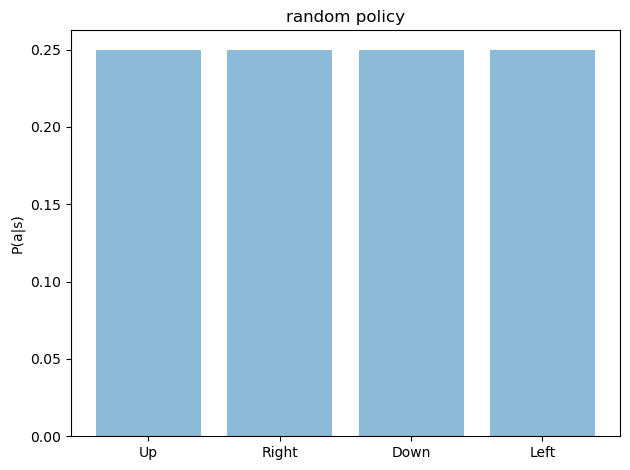

In [27]:
plt.bar(y_pos, action_prob,alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('P(a|s)')
plt.title('random policy')
plt.tight_layout()
plt.show()

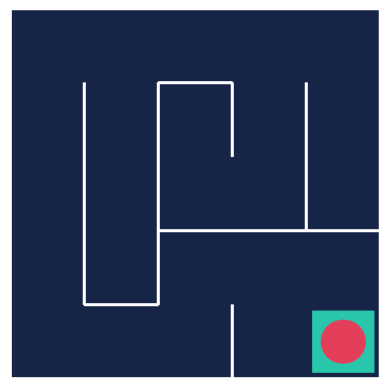

In [30]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array'))
while not done:
    action = np.random.choice(range(4),1,p=action_prob)
    _,_,done,_ = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()